In [30]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

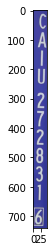

In [32]:
img = cv2.imread('CargoContainerImages/CAIU2728316.jpg')
plt.imshow(img)

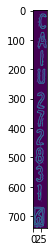

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blured = cv2.GaussianBlur(gray,(5,5),cv2.BORDER_DEFAULT)
edged= cv2.Canny(blured, 30,15)
plt.imshow(edged)

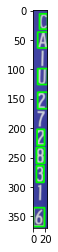

In [34]:
large = cv2.imread('CargoContainerImages/CAIU2728316.jpg')
rgb = cv2.pyrDown(large)
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)
_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
mask = np.zeros(bw.shape, dtype=np.uint8)
for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)
    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)
# show image with contours rect
plt.imshow(rgb)


In [35]:
def x_cord_contour(contour):
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))
 
def makeSquare(not_square):
    BLACK = [0,0,0]
    img_dim = not_square.shape
    height = img_dim[0]
    width = img_dim[1]
    if (height == width):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        height = height * 2
        width = width * 2
        if (height > width):
            pad = int((height - width)/2)
            doublesize_square = cv2.copyMakeBorder(doublesize,0,0,pad,pad,cv2.BORDER_CONSTANT,value=BLACK)
        else:
            pad = int((width - height)/2)
            doublesize_square = cv2.copyMakeBorder(doublesize,pad,pad,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    doublesize_square_dim = doublesize_square.shape
    return doublesize_square
 
def resize_to_pixel(dimensions, image):
    buffer_pix = 4
    dimensions  = dimensions - buffer_pix
    squared = image
    r = float(dimensions) / squared.shape[1]
    dim = (dimensions, int(squared.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    img_dim2 = resized.shape
    height_r = img_dim2[0]
    width_r = img_dim2[1]
    BLACK = [0,0,0]
    if (height_r > width_r):
        resized = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value=BLACK)
    if (height_r < width_r):
        resized = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value=BLACK)
    p = 2
    ReSizedImg = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value=BLACK)
    img_dim = ReSizedImg.shape
    height = img_dim[0]
    width = img_dim[1]
    return ReSizedImg

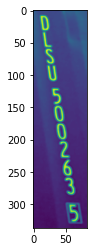

boundaries....
11 8 14 24
(24, 14)
all_im size:  24 14
15 34 14 24
(24, 14)
all_im size:  24 14
19 59 14 25
(25, 14)
all_im size:  25 14
22 85 15 25
(25, 15)
all_im size:  25 15
29 120 15 26
(26, 15)
all_im size:  26 15
32 147 16 26
(26, 16)
all_im size:  26 16
36 175 16 25
(25, 16)
all_im size:  25 16
41 201 15 28
(28, 15)
all_im size:  28 15
46 231 14 26
(26, 14)
all_im size:  26 14
49 259 16 27
(27, 16)
all_im size:  27 16
55 300 15 28
(28, 15)
all_im size:  28 15


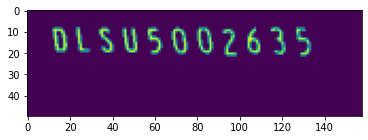

tesseract ocr result:  aa



In [49]:
image = cv2.imread('CargoContainerImages/DLSU5002635_2.jpg')
#image = cv2.imread('CargoContainerImages/SEGU4806170.PNG')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
 
edged = cv2.Canny(blurred, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
#Sort out contours left to right by using their x cordinates
filtered_contours = [c for c in contours if cv2.contourArea(c) > 10]
contours = sorted(filtered_contours, key = x_cord_contour, reverse = False)
# Create empty array to store entire number
full_number = []

plt.imshow(blurred)
plt.show()

pad = 8
total_width = 0
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)    
    total_width += w + pad
    
contours = sorted(contours, key = lambda c: cv2.boundingRect(c)[1])
all_im = np.zeros([100, total_width + 64], dtype=np.uint8) ##height 모자라는 거 같아서 80->100
    
offset = 24
print('boundaries....')
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)   
    print(x, y, w, h)
    if w >= 0 and h >=0:
        roi = blurred[y:y + h, x:x + w]
        final = roi
        print(roi.shape)
        print('all_im size: ', h, w)
        all_im[16:h + 16, offset:offset + w] = roi
        offset += w + pad
        #print(x, y, x+w, y+h)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
all_im[all_im < 127] = 0
scale = 0.5
all_im = cv2.resize(all_im, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
plt.imshow(all_im)
plt.show()
config = '-l eng --oem 3 --psm 8 tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTU0123456789" '
print('tesseract ocr result: ', pytesseract.image_to_string(all_im, config=config))